# Filling time gaps </a><a name='top'>

This notebook aims at filling in the time gaps (missing data) in the netcdf files by adding data artificially. The objective is to have datasets with no missing timestamps, to be able to have rolling windows in time rather than in indices.
    
Please fill in [**this section**](#params) before running the notebook, to define the correct parameters.

One issue will be that we need regular timestamps to applyl rolling windows, so we will need to either add many intermediate timestamps (PGCD approach), or remove some of the files already existant (PPCM approach).

## Imports and functions

In [1]:
%run little_awk_functions.py

In [2]:
import os

## Define parameters </a><a name='params'>

In [3]:
day_date = '2022-01-21'

original_netcdf_directory = '/home/mabonnet/Desktop/data/Data_netcdf/2022-jan-feb/'    # where to go look for the files to fill in
output_netcdf_directory = '/home/mabonnet/Desktop/data/Data_netcdf/data-filled/'    # where to store the newly created netcdf files

default_dataset = xr.open_dataset('/home/mabonnet/Desktop/data/Data_netcdf/2022-jan-feb/20220101.nc')     # any dataset containing x and y coordinates in the desired format


[Back to top section](#top)

## Data definition

In [4]:
split_day = day_date.split('-')
file_date = split_day[0] + split_day[1] + split_day[2]

# Check if a netcdf file with the day_date data exists already

if os.path.isfile(original_netcdf_directory + file_date + '.nc'):
    data_set_used = xr.open_dataset(original_netcdf_directory + file_date + '.nc')
    ds_is_file = True

else:
    data_set_used = default_dataset
    ds_is_file = False


In [5]:
# Fill in missing timestamps
# WARNING this cell may produce a new file and/or destroy previously existing ones. It is wise to always comment the line when not in active use

# fill_in_missing_times(data_set_used, day_date, output_netcdf_directory, ds_corresponds_to_file=ds_is_file)

## Check the data is well transferred and filled in

/home/mabonnet/Desktop/data/Data_netcdf/data-filled/20220121.nc


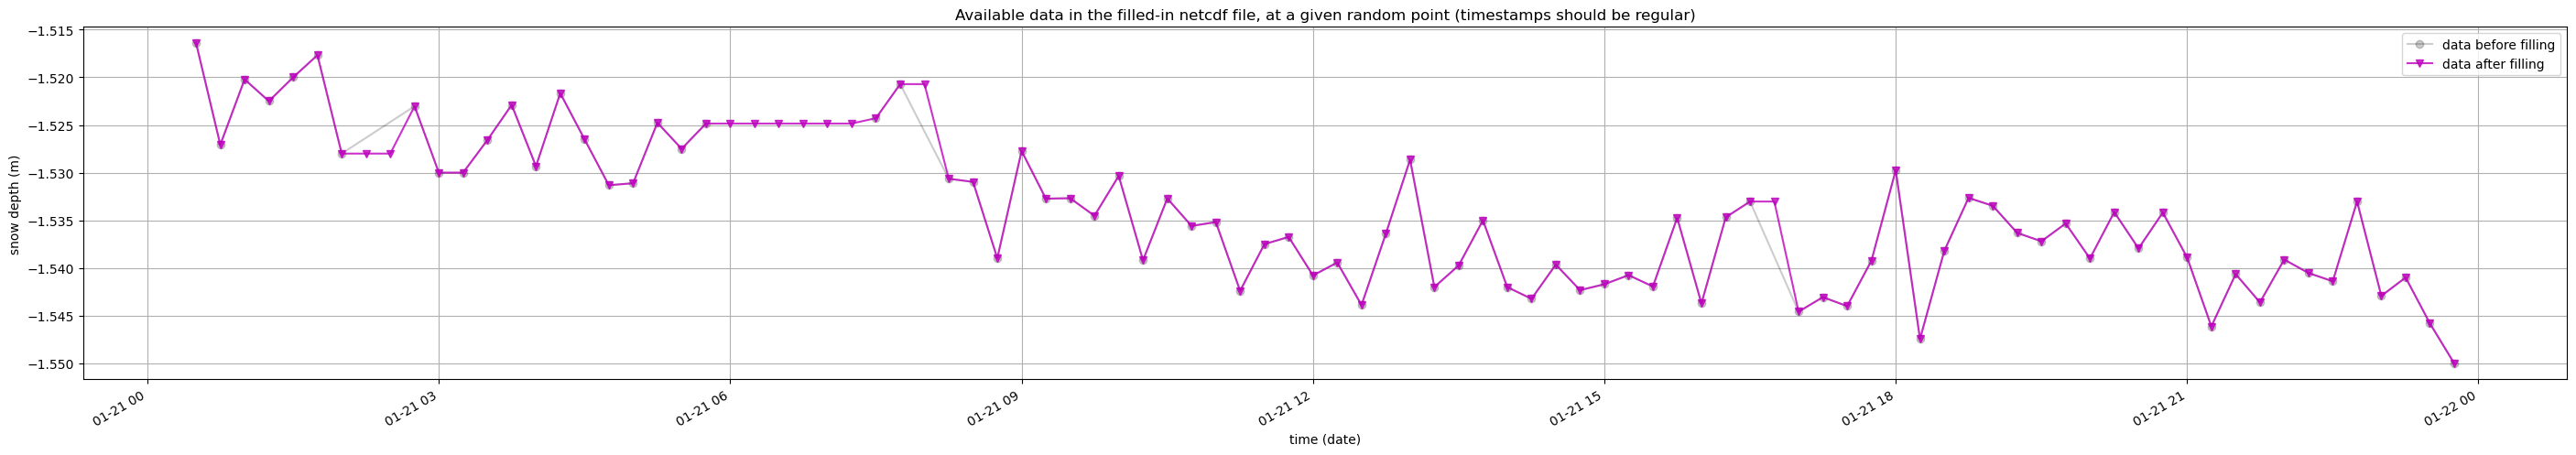

In [6]:
# Plot the data before and after filling in for comparison

data_set_used_filled = xr.open_dataset(output_netcdf_directory + file_date + '.nc')
print(output_netcdf_directory + file_date + '.nc')
data_set_used_filled = data_set_used_filled.ffill(dim='time')

x_sel = 50
y_sel = 42

plt.figure(figsize=(35, 5))

data_set_used.isel(x=x_sel, y=y_sel)['mean'].plot(c='k', alpha=0.2, marker='o', label='data before filling')
data_set_used_filled.isel(x=x_sel, y=y_sel)['mean'].plot(c='m', alpha=0.8, marker='v', label='data after filling')

plt.grid()
plt.ylabel('snow depth (m)')
plt.xlabel('time (date)')
plt.title('Available data in the filled-in netcdf file, at a given random point (timestamps should be regular)')
plt.legend()
